In [2]:
import multiprocessing
import pandas as pd
import gzip
import glob
import dask

In [3]:
numthreads = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=numthreads)

In [20]:
allfiles=glob.glob("intraday/*.csv.gz")

In [21]:
def data_get(file_name):
    #Data = []
   # for file_name in file_name_list:
    with gzip.open(file_name) as f:
        data = pd.read_csv(f)
            #Data.append(data)
    return data


In [24]:
data_get(allfiles[1]).head()

,date,second,bid,bidQ,ask,askQ,last,lastQ
0,42674,14400.072,212.54,4,214.66,3,-1.0,-1
1,42674,14400.073,212.54,4,213.60,1,-1.0,-1
2,42674,14400.075,212.85,39,213.40,40,-1.0,-1
3,42674,14400.102,212.85,39,213.30,50,-1.0,-1
4,42674,14400.315,212.85,39,213.33,50,-1.0,-1


In [26]:

# allfiles=glob.glob("/Users/lin/Desktop/Study/Financial Big Data/ex6/data/*.csv.gz")
# nFilesPerThread=int(len(allfiles)/numthreads)
# result_list = pool.map(data_get,allfiles)

In [8]:
    pool.terminate()    # free up memory
# reduce the result into a single dict  (if needed)
    result = {}
    map(result.update, result_list)

In [1]:
start = time()
for name in allfiles:
    
    data_get(name)
    end = time()
end -start

NameError: name 'time' is not defined

In [27]:
from time import time
start = time()
worker_delayed=dask.delayed(data_get)
alldata=[worker_delayed(fn) for fn in allfiles]
dask.compute(alldata)
end = time()
 end -start

In [28]:
diff 

4.638242959976196

In [12]:
dask.delayed??

# week 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns 

In [4]:
mean = [0,0]
cov = [[1,0],[0,1]]

In [5]:
x,y = np.random.multivariate_normal(mean, cov, 10000).T

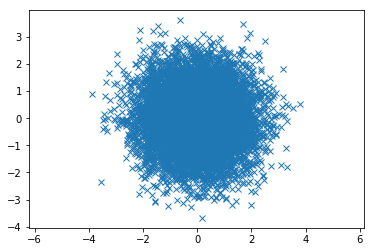

In [6]:
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [39]:
ex = np.random.standard_normal(3)
nx = np.random.standard_normal(3)
p = 0.8

In [40]:
x = math.sqrt(1-0.8)*ex + math.sqrt(0.8)*nx

In [54]:
x*y

array([ 0.66346688, -0.03763159,  0.42908317])

In [75]:
P_list = []
for i in range(1000):
    ex = np.random.standard_normal(4)
    n = np.random.standard_normal(4)
    ey = np.random.standard_normal(4)
    p = 0.8
    x = math.sqrt(1-p)*ex + math.sqrt(p)*n
    y = math.sqrt(1-p)*ey + math.sqrt(p)*n
    P = sum(x*y.T)/len(x)
    P_list.append(P)
mu = sum(x*y)/len(x)
sigma = (1-0.8**2)**2/len(x)
s = np.random.normal(mu, sigma, 1000)

/home/eric/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


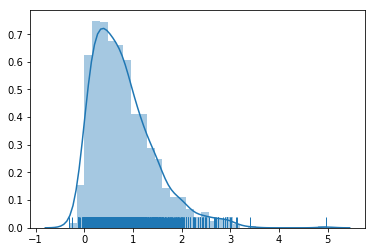

In [83]:
sns.distplot(P_list, rug=True)

/home/eric/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


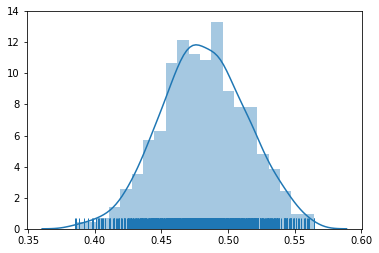

In [84]:
sns.distplot(s, rug=True)

In [86]:
np.zeros?

In [16]:
N = 10
T = 20

In [17]:
X = np.zeros((N,T))
for i in range(N):
    for t in range(T):
        X[i][t] = np.random.normal(0,1)
C = np.dot(X,X.T)/T


In [18]:
u, s, vh = np.linalg.svd(C, full_matrices=True)

In [19]:
for s1 in s:
    print(s1)

2.484796029105991
1.99458414581231
1.9213162758578834
1.7741153328997596
0.8738862246886527
0.7212506322824956
0.6138228333827231
0.4492349568752015
0.37915692023165276
0.1601518948904954


In [20]:
q = 1.0*N/T
r = 1+q+2*math.sqrt(q)
r_ = 1+q-2*math.sqrt(q) 

In [24]:
S = np.zeros(len(s))
for i in range(len(s)):
    S[i] = 1/(q*np.pi) *np.sqrt((r-s[i])*(s[i]-r_))/s[i]

In [25]:
S

array([1.66492208, 1.37960742, 1.34404339, 1.27598375, 0.89003617,
       0.81747937, 0.76213564, 0.66697504, 0.62135237, 0.48915602])